$$
\begin{aligned}
    \min_{x}\; &f(x) \\
    \text{s.t.}\; &h(x) = 0
\end{aligned}
$$

$$
\mathcal{L}(x, \lambda) = f(x) + \lambda^\top h(x) 
$$

$$
F(x, \lambda) = 
\begin{bmatrix}
    \nabla_x f(x) + A(x)^\top \lambda \\
    h(x)
\end{bmatrix} = 0
$$

$$
A(x)^\top = \begin{bmatrix}
    \nabla_x h_1(x) & \nabla_x h_2(x) & \dots & \nabla_x h_m(x)
\end{bmatrix}
$$

$$
\begin{bmatrix}
    \nabla_{xx} \mathcal{L} (x, \lambda) &  A(x)^\top \\
    A(x) & 0 
\end{bmatrix}
$$

$$
\begin{bmatrix}
    \nabla_{xx} \mathcal{L}_k &  A_k^\top \\
    A_k & 0 
\end{bmatrix}
\begin{bmatrix}
    p_k \\ p_\lambda 
\end{bmatrix} = 
\begin{bmatrix}
    -\nabla_{x} f_k - A_k^\top \lambda_k \\ -c_k
\end{bmatrix}
$$

$$
\begin{aligned}
    \begin{bmatrix}
        \nabla_{xx} \mathcal{L}_k &  A_k^\top \\
        A_k & 0 
    \end{bmatrix}
    \begin{bmatrix}
        p_k \\ \lambda_{k+1} -  \lambda_{k}
    \end{bmatrix} &= 
    \begin{bmatrix}
        -\nabla_{x} f_k - A_k^\top \lambda_k \\ -c_k
    \end{bmatrix} \\
    \begin{bmatrix}
        \nabla_{xx} \mathcal{L}_k &  A_k^\top \\
        A_k & 0 
    \end{bmatrix}
    \begin{bmatrix}
        p_k \\ \lambda_{k+1}
    \end{bmatrix} &= 
    \begin{bmatrix}
        -\nabla_{x} f_k \\ -c_k
    \end{bmatrix}
\end{aligned}
$$

$$
P(x; \rho) = f(x) + \frac{\rho}{2} \Vert h(x) \Vert^2_2
$$

$$
\nabla_x P(x; \rho) = \nabla_x f(x) + \rho A(x)^\top h(x)
$$


$$
\nabla^2_{xx} P(x; \rho) = \nabla^2_{xx} f(x) + \rho \left( A(x)^\top A(x) + \sum_{i=1}^{m} h_i(x) \nabla^2_x h_i(x) \right)
$$

Optimal Solution: [0.70710678 0.70710678]
Maximum Value: 0.4999999999999999


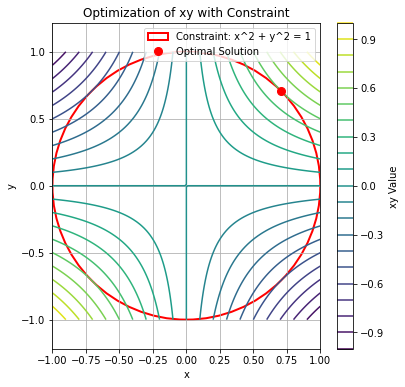

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Objective function (negated for minimization)
def objective(vars):
    x, y = vars
    return -x * y  # We maximize xy by minimizing -xy

# Equality constraint x^2 + y^2 = 1
def constraint(vars):
    x, y = vars
    return x**2 + y**2 - 1

# Initial guess
x0 = [1/np.sqrt(2), 1/np.sqrt(2)]

# Define constraint dictionary
cons = {'type': 'eq', 'fun': constraint}

# Solve the optimization problem
result = minimize(objective, x0, constraints=cons, method='SLSQP')

# Output the result
print("Optimal Solution:", result.x)
print("Maximum Value:", -result.fun)

# Visualization
x_vals = np.linspace(-1, 1, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X * Y  # Function to maximize

plt.figure(figsize=(6,6))
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contours, label='xy Value')

# Plot constraint (unit circle)
circle = plt.Circle((0, 0), 1, color='red', fill=False, linewidth=2, label='Constraint: x^2 + y^2 = 1')
plt.gca().add_patch(circle)

# Plot optimal solution
opt_x, opt_y = result.x
plt.plot(opt_x, opt_y, 'ro', markersize=8, label='Optimal Solution')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimization of xy with Constraint')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()
